In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#load road network & physical features
data_dir = 'D:/Thesis/dataset/Road/'
road_net = pd.read_csv(data_dir + 'Roadnetwork.txt',delimiter='\s+', header=None, index_col=False) 
road_ftrs = pd.read_csv(data_dir + 'Roadfeature.txt',delimiter='\s+', header=None, index_col=False) 


In [5]:
# road_ftr = road_ftrs.loc[:,0:7]
road_ftrs.columns =['road_id','length','lanes','max_speed','dir','level','tor','n_connnections','school','ofc', 'bnk', 'mall', 'rest', 'gas_st', 'spot', 'hotel', 'trans', 'living_ser', 'sum_poi']

In [6]:
def calculate_weighted_poi(df):
    # Define realistic weights for each POI type
    weights = {
        'school': 1.3,
        'ofc': 1.2,
        'bnk': 1.0,
        'mall': 1.5,
        'rest': 1.1,
        'gas_st': 0.8,
        'spot': 1.4,
        'hotel': 1.0,
        'trans': 1.6,
        'living_ser': 0.9
    }
    
    # List of POI columns
    poi_columns = ['school', 'ofc', 'bnk', 'mall', 'rest', 'gas_st',
                   'spot', 'hotel', 'trans', 'living_ser']
    
    # Calculate weighted POI score
    df['weighted_POI'] = df[poi_columns].mul(pd.Series(weights)).sum(axis=1)
    
    return df['weighted_POI']

In [7]:
road_ftrs['weighted_POI'] = calculate_weighted_poi(road_ftrs)

In [8]:
level1_ftrs = road_ftrs[road_ftrs['level']<= 1]
level2_ftrs = road_ftrs[road_ftrs['level']== 2]
level3_ftrs = road_ftrs[road_ftrs['level']>= 3]

In [9]:
level1_ftrs.head()

,road_id,length,lanes,max_speed,dir,level,tor,n_connnections,school,ofc,bnk,mall,rest,gas_st,spot,hotel,trans,living_ser,sum_poi,weighted_POI
129,129,460.532158,1,8.333333,0,1,1.005370,4,0,0,0,0,0,0,0,0,0,0,0,0.0
130,130,411.439939,2,30.555556,0,0,1.000000,2,0,0,0,0,0,0,0,0,0,0,0,0.0
131,131,419.201938,2,30.555556,0,0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0.0
179,179,668.251186,2,30.555556,0,0,1.000559,2,0,0,0,0,0,0,0,0,0,0,0,0.0
180,180,660.378796,2,30.555556,0,0,1.000547,2,0,0,0,0,1,0,0,0,0,0,1,1.1


In [10]:
level1_ftrs.columns

Index(['road_id', 'length', 'lanes', 'max_speed', 'dir', 'level', 'tor',
       'n_connnections', 'school', 'ofc', 'bnk', 'mall', 'rest', 'gas_st',
       'spot', 'hotel', 'trans', 'living_ser', 'sum_poi', 'weighted_POI'],
      dtype='object')

In [49]:
output_dir = 'D:/Thesis/files_output_dir/output_preprocessing/'
level1_ftrs.to_csv(output_dir + 'level1_ftrs.csv',index=False)
level2_ftrs.to_csv(output_dir + 'level2_ftrs.csv',index=False)
level3_ftrs.to_csv(output_dir + 'level3_ftrs.csv',index=False)

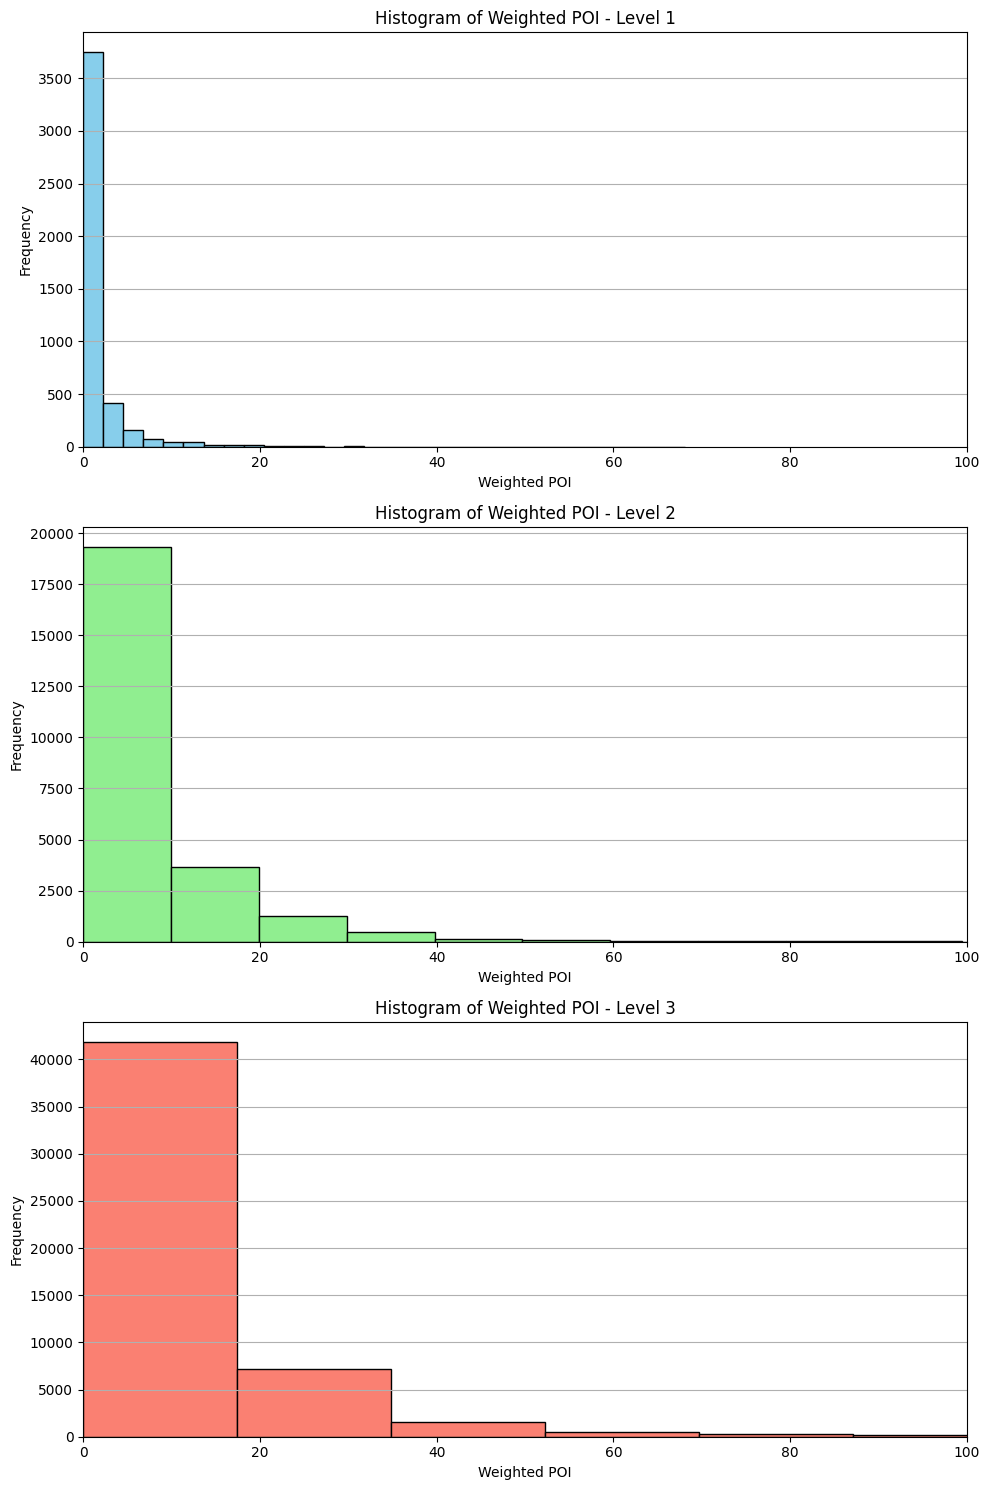

In [17]:
# Creating subplots for each dataframe's 'weighted_POI' with x-axis limited to 100
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plotting histogram for level1_ftrs
axes[0].hist(level1_ftrs['weighted_POI'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Weighted POI - Level 1')
axes[0].set_xlabel('Weighted POI')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y')
axes[0].set_xlim(0, 100)

# Plotting histogram for level2_ftrs
axes[1].hist(level2_ftrs['weighted_POI'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Histogram of Weighted POI - Level 2')
axes[1].set_xlabel('Weighted POI')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y')
axes[1].set_xlim(0, 100)

# Plotting histogram for level3_ftrs
axes[2].hist(level3_ftrs['weighted_POI'], bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Histogram of Weighted POI - Level 3')
axes[2].set_xlabel('Weighted POI')
axes[2].set_ylabel('Frequency')
axes[2].grid(axis='y')
axes[2].set_xlim(0, 100)

# Displaying the plots with x-axis limited to 100
plt.tight_layout()
plt.show()


## History Speed

In [50]:
data_dir = 'D:/Thesis/dataset/Speed History/'

In [51]:
history_speed_workday = pd.read_csv(data_dir + "history.workday.speed", sep='\s+',header=None)
history_speed_workday.columns = ['road_id','time','avg_speed','avg_speed std','no_taxi_car']

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\k\AppData\Local\Temp\ipykernel_17136\1857284427.py:1: SyntaxWarning: invalid escape sequence '\s'
  history_speed_workday = pd.read_csv(data_dir + "history.workday.speed", sep='\s+',header=None)


In [52]:
history_speed_holiday = pd.read_csv(data_dir + "history.holiday.speed", sep='\s+',header=None)
history_speed_holiday.columns = ['road_id','time','avg_speed','avg_speed std','no_taxi_car']

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\k\AppData\Local\Temp\ipykernel_17136\2282552186.py:1: SyntaxWarning: invalid escape sequence '\s'
  history_speed_holiday = pd.read_csv(data_dir + "history.holiday.speed", sep='\s+',header=None)


In [37]:
history_speed_workday.shape
history_speed_holiday.shape

(7190368, 5)

In [38]:
# history_speed_workday.head()
history_speed_holiday.head()

,road_id,time,avg_speed,avg_speed std,no_taxi_car
0,4,0,13.251063,2.861841,4
1,7,0,8.909047,4.204858,21
2,8,0,4.800125,5.773583,27
3,19,0,10.867663,6.115532,10
4,20,0,11.762047,1.951945,3


In [53]:
level1_history_speed_workday = history_speed_workday[history_speed_workday['road_id'].isin(level1_ftrs['road_id'])] 
level2_history_speed_workday = history_speed_workday[history_speed_workday['road_id'].isin(level2_ftrs['road_id'])] 
level3_history_speed_workday = history_speed_workday[history_speed_workday['road_id'].isin(level3_ftrs['road_id'])] 

In [54]:
level1_history_speed_holiday = history_speed_holiday[history_speed_holiday['road_id'].isin(level1_ftrs['road_id'])] 
level2_history_speed_holiday = history_speed_holiday[history_speed_holiday['road_id'].isin(level2_ftrs['road_id'])] 
level3_history_speed_holiday = history_speed_holiday[history_speed_holiday['road_id'].isin(level3_ftrs['road_id'])] 

In [55]:
# level1_history_speed_workday.head()
level1_history_speed_holiday.head()

,road_id,time,avg_speed,avg_speed std,no_taxi_car
55,209,0,12.851251,3.592383,13
56,210,0,19.338764,3.581764,10
57,211,0,16.743753,4.788815,18
61,218,0,6.150425,0.651551,4
70,239,0,11.276381,2.940108,5


In [23]:
history_speed_data = level3_history_speed_workday
# Check for missing values
missing_values = history_speed_data.isnull()

# Group by 'road_id' and 'time'
missing_by_group = missing_values.groupby(['road_id', 'time']).sum()

# Summarize missing values
summary_missing = missing_by_group[missing_by_group > 0].dropna(how='all')

# Display the summary of missing values by 'road_id' and 'time'
print(summary_missing)

Empty DataFrame
Columns: [avg_speed, avg_speed std, no_taxi_car]
Index: []


In [56]:
# Merge the two DataFrames on 'road_id'
level1_road_workday = pd.merge(level1_ftrs, level1_history_speed_workday, on='road_id')
level2_road_workday = pd.merge(level2_ftrs, level2_history_speed_workday, on='road_id')
level3_road_workday = pd.merge(level3_ftrs, level3_history_speed_workday, on='road_id')

In [57]:
# Merge the two DataFrames on 'road_id'
level1_road_holiday = pd.merge(level1_ftrs, level1_history_speed_holiday, on='road_id')
level2_road_holiday = pd.merge(level2_ftrs, level2_history_speed_holiday, on='road_id')
level3_road_holiday = pd.merge(level3_ftrs, level3_history_speed_holiday, on='road_id')

In [58]:
level1_road_holiday.head()

,road_id,length,lanes,max_speed,dir,level,tor,n_connnections,school,ofc,...,spot,hotel,trans,living_ser,sum_poi,weighted_POI,time,avg_speed,avg_speed std,no_taxi_car
0,129,460.532158,1,8.333333,0,1,1.00537,4,0,0,...,0,0,0,0,0,0.0,16,9.313440,1.401034,3
1,129,460.532158,1,8.333333,0,1,1.00537,4,0,0,...,0,0,0,0,0,0.0,51,1.015883,0.109325,3
2,129,460.532158,1,8.333333,0,1,1.00537,4,0,0,...,0,0,0,0,0,0.0,57,1.354263,2.590976,5
3,129,460.532158,1,8.333333,0,1,1.00537,4,0,0,...,0,0,0,0,0,0.0,58,1.933138,3.207063,4
4,129,460.532158,1,8.333333,0,1,1.00537,4,0,0,...,0,0,0,0,0,0.0,97,4.690923,2.007195,3


In [59]:
output_dir = 'D:/Thesis/files_output_dir/output_preprocessing/'
level1_road_workday.to_csv(output_dir + 'level1_road_history_workday.csv',index=False)
level2_road_workday.to_csv(output_dir + 'level2_road_history_workday.csv',index=False)
level3_road_workday.to_csv(output_dir + 'level3_road_history_workday.csv',index=False)

In [60]:
level1_road_holiday.to_csv(output_dir + 'level1_road_history_holiday.csv',index=False)
level2_road_holiday.to_csv(output_dir + 'level2_road_history_holiday.csv',index=False)
level3_road_holiday.to_csv(output_dir + 'level3_road_history_holiday.csv',index=False)

## Data Samplling

In [34]:
data_history = level1_road_workday
# Define the column to stratify by
stratify_column = 'time'

# Define the fraction of each stratum to sample
frac = 0.01  # 1% of each group

# Perform stratified sampling
stratified_sample = data_history.groupby(stratify_column, group_keys=False).apply(lambda x: x.sample(frac=frac))

# Display the stratified sample
stratified_sample.head()

stratified_sample.to_csv(output_dir + 'stratified_level1_road_history.csv',index=False)

C:\Users\k\AppData\Local\Temp\ipykernel_17136\1657797864.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = data_history.groupby(stratify_column, group_keys=False).apply(lambda x: x.sample(frac=frac))


In [ ]:
# convert DF to np.array
net_rows = road_net.values
#create a directed graph
G = nx.DiGraph()
# Add edges and edge attributes
for idx in range(len(net_rows)):
    G.add_edge(net_rows[idx][1], net_rows[idx][2], edge_id = net_rows[idx][0])
    if road_ftrs.loc[idx]['dir'].values[0] > 0: #for bi-dirrection connection
      G.add_edge(net_rows[idx][2], net_rows[idx][1], edge_id = net_rows[idx][0])


In [ ]:
undir_G = G.to_undirected()

In [ ]:
# find knbrs(G, start=4, k=3))
def darw_net(node_id, k=1):
    nb = nx.single_source_shortest_path_length(G.to_undirected(), node_id, cutoff=k)
    sub_G =G.subgraph(list(nb.keys()))

    # edge_level
    edge_level=dict()
    for x,y,dic in sub_G.edges(data=True):
    #     print(x,y,dic['edge_id'])
        edge_level[(x,y)]= dic['edge_id']


    plt.figure(figsize=(6, 5))
    # graphviz_layout
    nx.draw(sub_G, with_labels=True, node_size=1500, node_color="skyblue",pos=nx.drawing.nx_agraph.graphviz_layout(sub_G))# pos= nx.spring_layout(sub_G) #pos=nx.drawing.nx_agraph.graphviz_layout(G)
    # edge_labels = nx.get_edge_attributes(sub_G,'edge_id')
    nx.draw_networkx_edge_labels(G, pos=nx.drawing.nx_agraph.graphviz_layout(sub_G), edge_labels = edge_level)
    plt.title("Road-Network, src:"+str(node_id)+', cutoff:'+ str(k))
    plt.show()

In [ ]:
def t_series(t_id,e_id ):
    '''list 2-step speed data in time series'''
    v = []
    if 0<= t_id -2:
        v.append(data.loc[t_id -2][e_id])
    if 0<= t_id -1:
        v.append(data.loc[t_id -1][e_id])
        
    if t_id +1 <24:
        v.append(data.loc[t_id +1][e_id])
    if t_id +2 <24:
        v.append(data.loc[t_id +2][e_id])
    return v


# def get_nb(edge_id,time_id, k=2): #k cutoff value
#     src, dst = net_rows[edge_id][1], net_rows[edge_id][2]
# #     print(edge_id,src, dst)
# #     H = G.subgraph([src, dst])
# #     print(list(H.edges))
#     nbr_spd =[]
    
#     pre_nodes = G.predecessors(src)
#     su_nodes = G.successors(dst)

# #     print('->:pre:',list(pre_nodes),'successor:',list(su_nodes))
    
#     nb = nx.single_source_shortest_path_length(G.to_undirected(), src, cutoff=k) # update use edge
#     sub_G =G.to_undirected().subgraph(list(nb.keys()))
#     for e in sub_G.edges(data=True):
#         e_id =e[2]['edge_id']
# #         print(e, int(road_ftr.loc[e_id]['lev']))
# #         print(e_id,'v:',data.loc[time_id][e_id])
#         nbr_spd.append(data.loc[time_id][e_id])
#         if e_id == edge_id:
# #             print('T_val:',t_series(time_id,e_id ))
#             t_spd = list(t_series(time_id,e_id))
# #     darw_net(src, k) #call draw function
#     return (nbr_spd,t_spd)

In [ ]:
def get_nbr_speed(edge_id,time_id, k=2): #k cutoff value
    src, dst = net_rows[edge_id][1], net_rows[edge_id][2]
#     nbr_spd =[]
    nbrs = set([src])
    temp = set()
    ed_set = set()#[edge_id]
    darw_net(src, k) #call draw function

    for lv in range(k):
        for n in nbrs:
            for nbr in undir_G[n]:
                temp.add(nbr)
                ed_id = undir_G[n][nbr]['edge_id']
                
                if ed_id not in ed_set:
                    ed_set.add(ed_id)
                    
#                     print(ed_id, time_id, data.loc[time_id][e_id]);
#                     nbr_spd.append(data.loc[time_id][e_id]);
                    
        nbrs = set(temp)

#     print(ed_set)
    ed_set.remove(edge_id)
    return ed_set


In [ ]:
# missing value cal
# new_data = pd.DataFrame(data)

for time_id in range(1):
    nan_pos = data.loc[time_id].isnull()
    print(time_id,'Null value count:',data.loc[time_id].isnull().sum())
    
    for e_id in range(20): # number of road seg./count_col
#         print(e_id ,nan_pos[e_id])
        if nan_pos[e_id] == True:
            nbr_spd =[]
            nbr_edges = get_nbr_speed(e_id,time_id,k=2)
            for nbr_ed in nbr_edges:
                nbr_spd.append(data.loc[time_id][nbr_ed])
            time_spd = t_series(time_id,e_id)
#             print(e_id, nbr_edges,nbr_spd, time_spd)
            print( 'T:',time_id,'E_id:',e_id,nbr_spd,time_spd,'-->',np.nanmean(nbr_spd+time_spd) )
            new_data[time_id][e_id] = np.nanmean(nbr_spd+time_spd)

#save data 
# np.savetxt('hist_speed_imputed_nbr.txt', new_data, delimiter=' ')

In [ ]:
print("***Count NaN in each row of a DataFrame***")    
for i in range(len(data.index)) :
    print("Nan in row ", i , " : " ,  data.iloc[i].isnull().sum())

In [ ]:
for time_id in range(24):
    nan_pos = data.loc[time_id].isnull()
    print(time_id,'Null value count:',data.loc[time_id].isnull().sum())
    
    for e_id in range(count_col): # number of road seg./count_col
#         print(e_id ,nan_pos[e_id])
        if nan_pos[e_id] == True:
            print(time_id, e_id ,data.loc[time_id][e_id], data[e_id].values)
            # fill value as column mean value
#             data.loc[time_id][e_id] = np.nanmean(data[e_id].values)

In [ ]:
# print(nx.number_weakly_connected_components(G))
# for c in nx.weakly_connected_components(G):
#     print(c)
# # >>> H = G.subgraph([0, 1, 2])
# # >>> list(H.edges)

In [ ]:
# f = open('hist_speed_imputed_nbr.txt', 'w')
# f.write( 'T:',time_id,'E_id:',e_id,spd,'-->',np.nanmean(spd[0]+spd[1]),'\n')
# f.close()
# #Nan in row
# for idx in range(len(new_data.index)) :
#     select_indices = new_data.iloc[idx].isnull()
#     col_nan = new_data.iloc[select_indices].index.tolist()
#     for col in col_nan:
#         new_data.loc[idx][col] = np.nanmean(new_data[col]) # mean of col values